# 波士顿房价数据探索

该数据集来自UCI机器学习知识库。波士顿房屋这些数据于1978年开始统计，共506个数据点，涵盖了麻省波士顿不同郊区房屋13种特征和房价中位数的信息。
本项目将原始数据集存为csv格式，方便调用pandas做数据分析。

在开始一项新任务时，通过可视化手段探索数据往往是任务的第一步，从而根据数据特点选择合适的数据预处理方式和机器学习模型。
相比直接阅读许多行原始数据，图表汇总数据能更好地帮助我们把握数据的要点。

## 导入必要的工具包

In [1]:
#数据处理
import numpy as np 
import pandas as pd 

#数据可视化
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Pandas提供了大量数据分析的方法，可以使用类似SQL的方式非常方便地加载、处理、分析这些表格形式的数据。
Pandas的主要数据结构是Series和DataFrame类。
Series是一个包含某种固定类型数据的一维数组。
DataFrame是一个二维数据表格，其中每列包含相同类型的数据。

搭配Matplotlib和Seaborn效果更好。

## 2. 读取数据

In [2]:
dpath = "./data/"
df = pd.read_csv("boston_housing.csv")

#显示前5行
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18,396.90,5.33,36.2


## 数据总体信息

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null int64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null int64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(9), int64(5)
memory usage: 55.4 KB


一、样本数N：506

二、特征维数：13，每个特征的数据类型，非空值的样本数目
1. CRIM：人均犯罪率 ；
2. ZN：住宅用地的比例（对超过两万五千平方英尺的区域） ；整数
3. INDUS：城镇中非零售营业比例；
4. CHAS：是否靠近Charles河的边界；整数
5. NOX：一氧化氮浓度 ；
6. RM：住宅平均房间数；
7. AGE：1940年之前建造的自住房屋的比例；
8. DIS：距离波士顿五个中心的加权距离；
9. RAD：高速公路的便利指数（索引）；整数
10. TAX ：每一万美元财产的全额财产税率； 整数
11. PTRATIO ：城乡师生比例；PTRATIO
12. B ：黑人比例
13. LSTAT ：低收入人群比例


三、标签y
MEDV ：自住房屋价格的中值

In [4]:
# 样本数目和特征维数
print(df.shape)

(506, 14)


In [5]:
#列的名字
print(df.columns)

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'MEDV'],
      dtype='object')


## 数据探索

查看数据各特征的分布，特征与标签之间的关系、以及特征之间相关性（是否存在冗余）。
数据表的特征类型通常有两种：
1. 数值型特征（int64和float64）
2. 类别型特征（categorical features）或离散型特征。离散型特征具有固定数目的值。如果特征只有两个取值，也成为二元（binary）变量。如果类别型变量的值具有顺序，称为有序（ordinal）类别型变量。

我们可以借用可视化工具来直观感觉数据的分布。
在Python中，有很多数据可视化途径。
Matplotlib非常强大，但很复杂，不易于学习。 
Seaborn是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用Seaborn就能做出很具有吸引力的图，而使用matplotlib就能制作具有更多特色的图。

在Boston房价预测数据集中，所有特征均为数值型特征（RAD为高速公路便利指数，亦可视为类别型特征；CHAS为0/1编码，为视为类别型特征或数据型特征）。

对数值型特征，describe方法可以特征的基本统计学特性：未缺失值的样本数目、均值、标准差、范围、四分位数。
查看非数值特征的统计数据时，需要通过include参数显式指定包含的数据类型。

In [6]:
# 对数值型特征，得到每个特征的描述统计量
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.347826,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.083004,356.674032,12.653063,22.532806
std,8.601545,23.310593,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.280574,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.000000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.000000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.000000,391.440000,11.360000,21.200000
75%,3.677082,12.000000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.000000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


此处得到各属性的样本数目、均值、标准差、最小值、1/4分位数（25%）、中位数（50%）、3/4分位数（75%）、最大值。
可初步了解各特征的分布。

### 单变量分布分析
对单个变量，可用直方图、箱体图等方式查看其大致分布、是否存在噪声数据点等

#### 数值型特征

##### 直方图
seaborn的distplot方法可以对数值型特征绘制直方图（distribution plot）

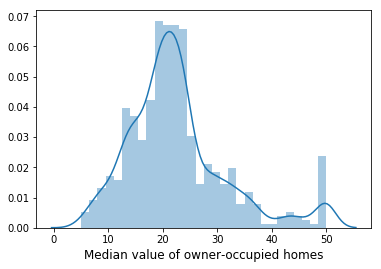

In [7]:
# 目标y（房屋价格）的直方图／分布
fig = plt.figure()
sns.distplot(df["MEDV"], bins=30, kde=True)
plt.xlabel("Median value of owner-occupied homes", fontsize=12)
plt.show()

可以看出，标签y主要集中在20附近，和正态分布比较接近。但较小的值比较密集，较大的值比较散（长尾），取值为最大值50的样本数较多（猜测是对大值做了截断），在模型训练时也可以考虑将y等于50的样本当成outliers（离群点）去掉。
纵轴为归一化后的值（概率密度）

另外对价格类特征，统称人对数值的敏感程度不是线性，可考虑对其进行log变换(Numpy的log1p)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a0cf07590>,
      dtype=object)

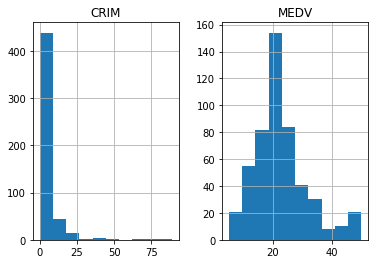

In [8]:
#使用DataFrame的hist()方法也可以绘制直方图（histogram）
#distplot绘图的纵轴为样本的比例，hist方法绘图的纵轴为样本数目
features = ["MEDV", "CRIM"]  #可以一次指定多个特征
df[features].hist()

##### 箱体图 boxplot& 提琴形图Violinplot
箱形图可以可视化特征的分位数等统计量，主要用于离群点的发现。其主要组成部分是箱子（box），须（whisker）和一些单独的数据点（离群值）。

箱子显示了分布的四分位距；它的长度由25%（Q1，下四分位数）和75%（Q3，上司分位数）决定。箱中的水平线表示中位数（50%）。

从箱子处延伸出来的线被称为须，表示数据点的总体散布，即位于区间(Q1 - 1.5xIQR, Q3 + 1.5xIQR)的数据点，其中IQR是四分位距：IQR= Q3 - Q1。

离群值是须之外的数据点，它们作为单独的数据点，沿着中轴绘制。

Violinplot结合了箱线图（boxplot）与核密度估计图的特点，可用于一个或多个分类变量情况下，连续变量数据的分布并进行了比较。
Violinplot还可以用于观察多个数据分布（如观察某个变量和标签之间的关系，本notebook最后部分）。

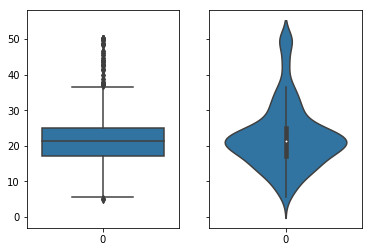

In [9]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df["MEDV"], ax=axes[0]); 
sns.violinplot(data=df["MEDV"], ax=axes[1]);

###### 输入属性的直方图／分布

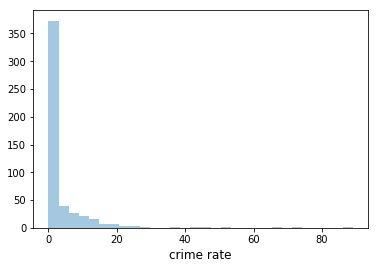

In [10]:
fig = plt.figure()
sns.distplot(df["CRIM"], bins=30, kde=False)
plt.xlabel("crime rate", fontsize=12)
plt.show()

犯罪率特征的分布是长尾分布，和指数分布比较接近。大部分城镇的犯罪率很低，极少数样本的犯罪率高。
可以考虑对该特征进行log(x+1)变换

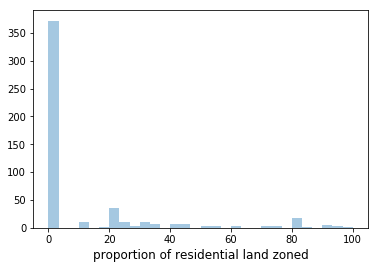

In [11]:
fig = plt.figure()
sns.distplot(df["ZN"], bins=30, kde=False)
plt.xlabel("proportion of residential land zoned", fontsize=12)
plt.show()

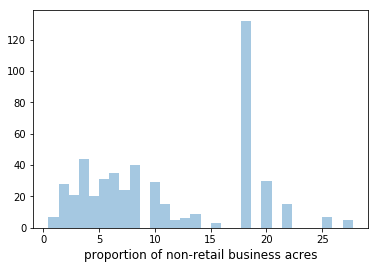

In [12]:
fig = plt.figure()
sns.distplot(df["INDUS"], bins=30, kde=False)
plt.xlabel("proportion of non-retail business acres", fontsize=12)
plt.show()

#### 离散型特征（类别型特征）
对离散型特征，可用频率表value_counts给出每个特征取值的样本数目。
或者采用countplot方法绘制直方图。 

##### 频率表 value_counts()
默认情况下，频率由高到低排列。

In [13]:
df["CHAS"].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

#### 条形图 countplot
频率表的图形化表示是条形图

Seaborn中还有一个函数，起了一个令人困惑的名字（barplot()），barplot()绝大部分情况下用于表示以某个类别特征分组的数值变量的一些基本统计数据。

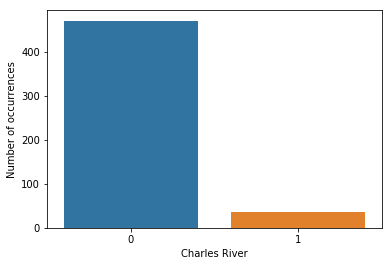

In [14]:
#离散型/类别型特征的分布可用countplot(纵轴为样本数目)
sns.countplot(df["CHAS"], order=[0, 1]);
plt.xlabel("Charles River");
plt.ylabel("Number of occurrences");

条形图countplot和直方图distplot看起来很像，都用于观察特征的分布，不同点：
1. 直方图用于查看数值变量的分布，而条形图用于类别特征。
2. 直方图的X轴是数值；条形图的X轴可能是任何类型：数字、字符串、布尔值。
3. 直方图的X轴是笛卡尔坐标轴；条形的顺序没有事先定义。不过条形经常按照高度排序，也就是值的频率。如果是有序变量，条形通常按照变量的值排序。

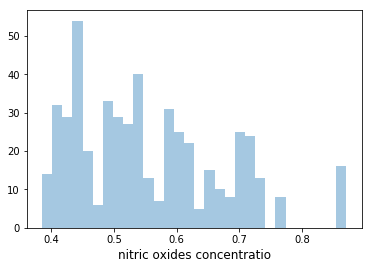

In [15]:
fig = plt.figure()
sns.distplot(df["NOX"], bins=30, kde=False)
plt.xlabel("nitric oxides concentratio", fontsize=12)
plt.show()

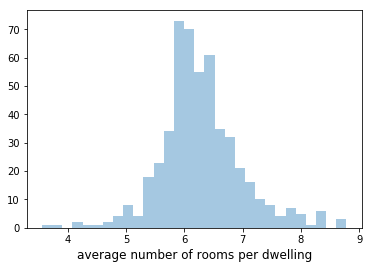

In [16]:
fig = plt.figure()
sns.distplot(df["RM"], bins=30, kde=False)
plt.xlabel("average number of rooms per dwelling", fontsize=12)
plt.show()

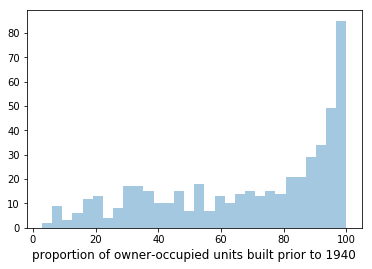

In [17]:
fig = plt.figure()
sns.distplot(df["AGE"], bins=30, kde=False)
plt.xlabel("proportion of owner-occupied units built prior to 1940", fontsize=12)
plt.show()

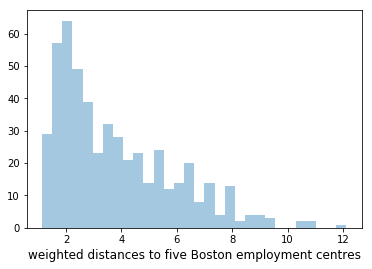

In [18]:
fig = plt.figure()
sns.distplot(df["DIS"], bins=30, kde=False)
plt.xlabel("weighted distances to five Boston employment centres", fontsize=12)
plt.show()

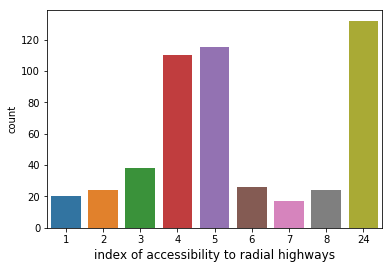

In [19]:
fig = plt.figure()
sns.countplot(df["RAD"])
plt.xlabel("index of accessibility to radial highways", fontsize=12)
plt.show()

Text(0.5,0,u'index of accessibility to radial highways')

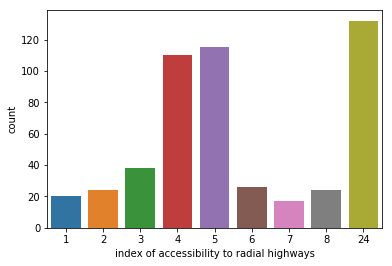

In [20]:
sns.countplot(df["RAD"])
plt.xlabel("index of accessibility to radial highways")

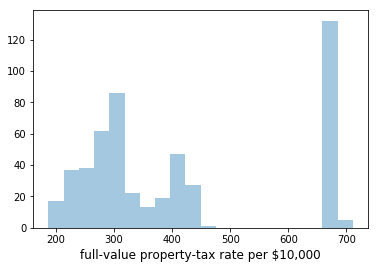

In [21]:
fig = plt.figure()
sns.distplot(df["TAX"], bins=20, kde=False)
plt.xlabel("full-value property-tax rate per $10,000", fontsize=12)
plt.show()

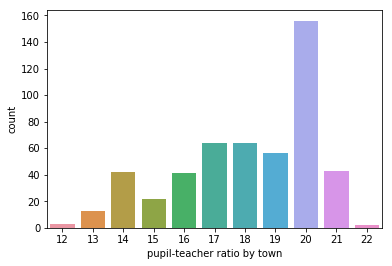

In [22]:
sns.countplot(df["PTRATIO"]);
plt.xlabel("pupil-teacher ratio by town");

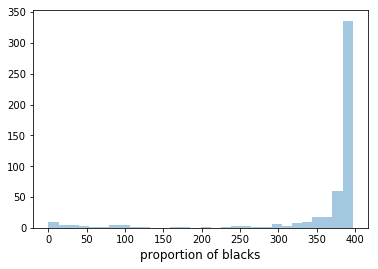

In [23]:
fig = plt.figure()
sns.distplot(df["B"], bins=30, kde=False)
plt.xlabel("proportion of blacks", fontsize=12)
plt.show()

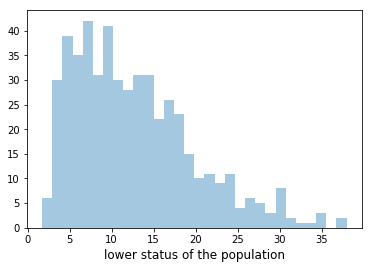

In [24]:
fig = plt.figure()
sns.distplot(df["LSTAT"], bins=30, kde=False)
plt.xlabel("lower status of the population", fontsize=12)
plt.show()

## 两两特征之间的相关性
两两特征之间的关系探索与要分析特征的类型有关。
1. 数值特征——数值特征
1.1 相关矩阵：两个数值特征之间的关系可用相关矩阵来查看它们之间的相关性。这一信息很重要，因为有有些机器学习算法（如普通最小二乘线性回归）不能很好地处理高度相关的输入变量。如果特征之间高度相关，可考虑进行PCA降维（特征层面）或加正则项（模型层面）。
可用DataFrame的corr()方法先计算出每对特征间的相关矩阵，然后将所得的相关矩阵传给seaborn的heatmap()方法，渲染出一个基于色彩编码的矩阵。
1.2 散点图（scatter）将两个数值变量的值显示为二维空间中的笛卡尔坐标。

2. 数值特征——类别特征
散点图中的数据点可以通过色彩或尺寸进行编码，以便在同一张图像中包括第三个类别变量的值。
也可以用lmplot()函数的hue参数来指定感兴趣的类别特征。
violinplot/boxplot可表示输入两个特征，用于表示在一个特征取值下（类别型特征），另一个特征（数值特征）的分布或统计量。

3. 类别特征——类别特征
通过设置参数hue，在图形中加入类别维度
除了使用图形进行类别分析之外，还可以使用统计学的传统工具：列联表（contingency table），又称为交叉制表（cross tabulation），使用表格形式表示多个类别变量的频率分布。我们可以通过查看一列或一行来得知某个变量在另一变量的作用下的分布。

### 相关矩阵

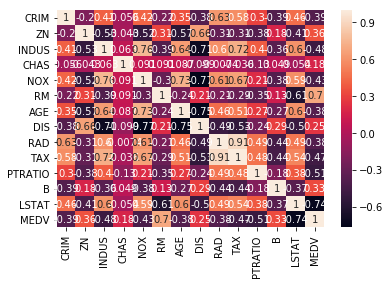

In [25]:
#get the names of all the columns
cols = df.columns 

# Calculates pearson co-efficient for all combinations，通常认为相关系数大于0.5的为强相关
data_corr = df.corr()
sns.heatmap(data_corr,annot=True)

In [26]:
data_corr.shape

(14, 14)

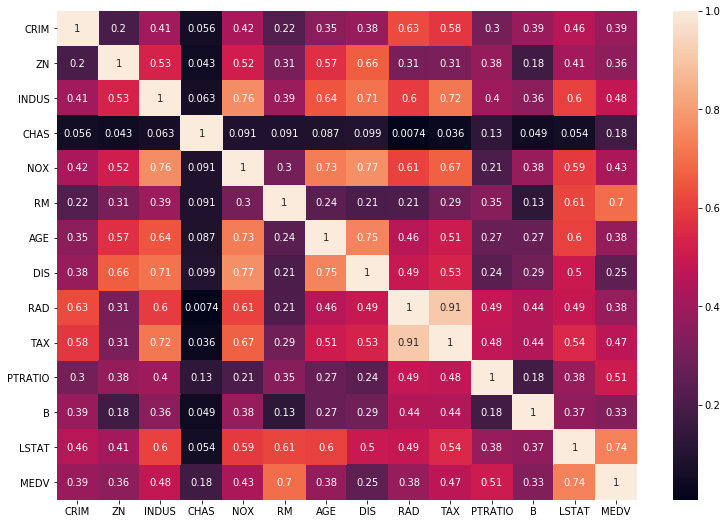

In [27]:
# 得到相关系数的绝对值，通常认为相关系数的绝对值大于0.5的特征为强相关
data_corr = data_corr.abs()
plt.subplots(figsize=(13, 9))
sns.heatmap(data_corr,annot=True)

# Mask unimportant features,突出重要信息
sns.heatmap(data_corr, mask=data_corr < 0.5, cbar=False)

#plt.savefig("house_coor.png" )
plt.show()

In [28]:
#Set the threshold to select only highly correlated attributes
threshold = 0.5
# List of pairs along with correlation above threshold
corr_list = []
#size = data.shape[1]
size = data_corr.shape[0]

#Search for the highly correlated pairs
for i in range(0, size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))

RAD and TAX = 0.91
NOX and DIS = 0.77
INDUS and NOX = 0.76
AGE and DIS = 0.75
LSTAT and MEDV = 0.74
NOX and AGE = 0.73
INDUS and TAX = 0.72
INDUS and DIS = 0.71
RM and MEDV = 0.70
NOX and TAX = 0.67
ZN and DIS = 0.66
INDUS and AGE = 0.64
CRIM and RAD = 0.63
RM and LSTAT = 0.61
NOX and RAD = 0.61
INDUS and LSTAT = 0.60
AGE and LSTAT = 0.60
INDUS and RAD = 0.60
NOX and LSTAT = 0.59
CRIM and TAX = 0.58
ZN and AGE = 0.57
TAX and LSTAT = 0.54
DIS and TAX = 0.53
ZN and INDUS = 0.53
ZN and NOX = 0.52
AGE and TAX = 0.51
PTRATIO and MEDV = 0.51


### 散点图
matplotlib库的scatter()方法
或
seaborn库的jointplot方法（kind参数为scatter）

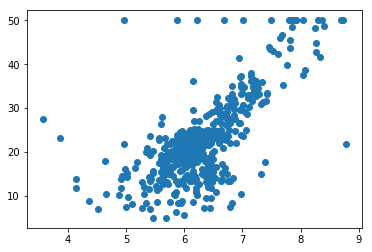

In [29]:
plt.scatter(df["RM"], df["MEDV"])

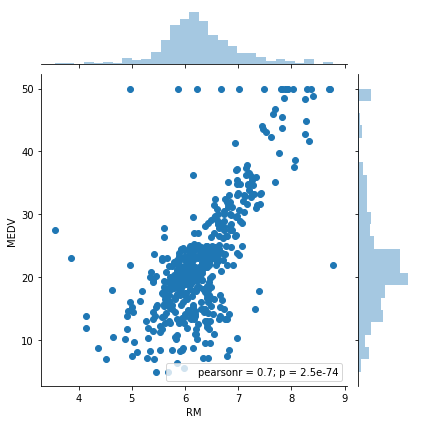

In [30]:
sns.jointplot(x="RM", y="MEDV",

              data=df, kind="scatter");

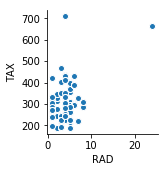

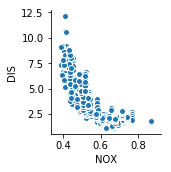

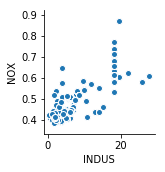

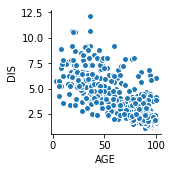

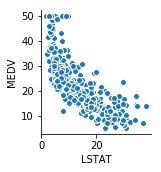

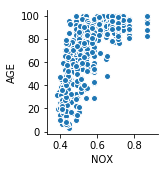

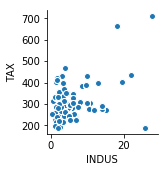

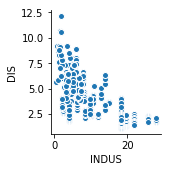

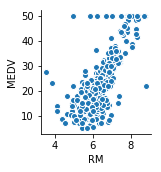

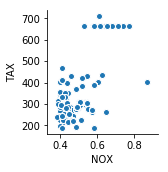

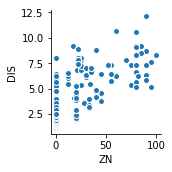

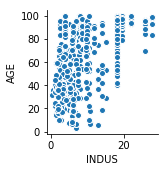

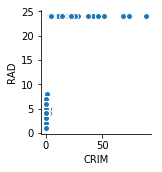

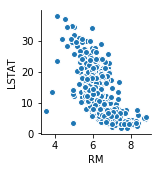

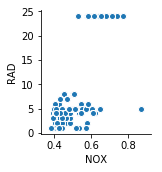

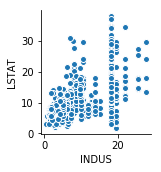

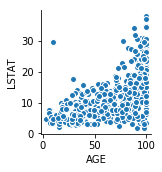

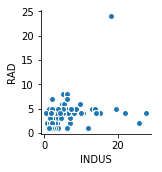

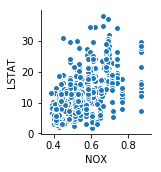

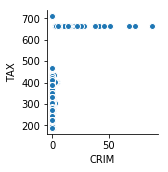

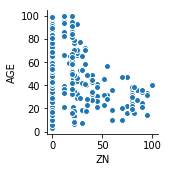

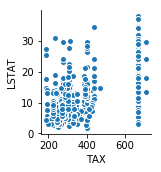

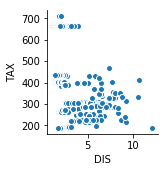

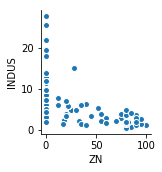

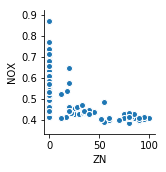

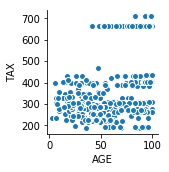

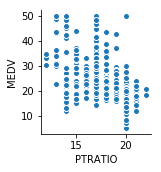

In [31]:
# Scatter plot of only the highly correlated pairs
# 使用SVG格式可能导致pairplot变得非常慢
%config InlineBackend.figure_format = "png"
for v,i,j in s_corr_list:
    sns.pairplot(df, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

### 参数hue表示类别

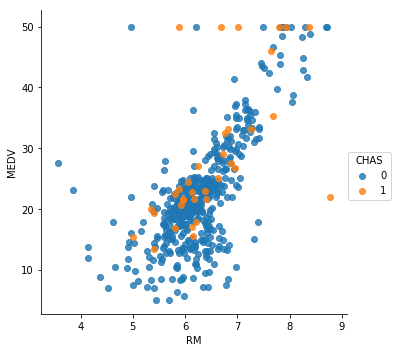

In [32]:
sns.lmplot('RM', 'MEDV', data=df, hue='CHAS', fit_reg=False);

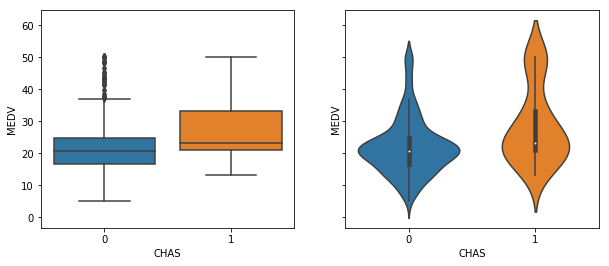

In [33]:
 _, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4)) 
sns.boxplot(x="CHAS", y="MEDV", data=df,ax=axes[0]) 
sns.violinplot(x="CHAS", y="MEDV", data=df, ax=axes[1]);

可以看出，不同CHAS取值，目标MEDV的分布不同，初步断定CHAS和目标MEDV有关系。